#**DATA PREPARATION 2**

**Goal** : Preprocessing the data to be "machine learning" ready

**Steps**
1. Importing data prepared from data preparation 1 along withe the necessary libraries
2. Splitting the data set from onset to avoid bias
3. Converting all dtytpes into numeric dtypes
4. Handling missing values
5. Selecting relevant columns from ML data
6. Outlier detection
7. Handling data imbalance using SMOTE

## Computing the descriptors

In [ ]:
!pip install rdkit
!pip install mordred

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 69.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.5 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176723 sha256=d262309c6e6949f4aa76db962ad73d04bc4cca47ca2629778a42345c147f6cd0
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [ ]:
import pandas as pd
import numpy as np


url = "https://raw.githubusercontent.com/Ghaby-X/VP16-inhibitors-pred/main/Assayresults_preprocessed.csv"

In [ ]:
df = pd.read_csv(url)
df

,Unnamed: 0,PUBCHEM_CID,Canonical_smiles,Activity_score,Activity_outcome
0,0,72810.0,C1=CC2=C(C3=C(C=CC=N3)C(=O)C2=O)N=C1,100.0,1
1,1,23618032.0,CN(C)C1=NC=NC2=C1N=CN2[C@H]3[C@@H]([C@@H]([C@H...,99.0,1
2,2,99927.0,CC1C(C(CC(O1)OC2CC(OC(C2O)C)OC3=CC4=CC5=C(C(=O...,99.0,1
3,3,254021.0,C1=CC=C2C(=C1)C3=C(C=C(C=C3)N)C(=O)C2=O,99.0,1
4,4,45280821.0,CCC(C)C1C(CC(=O)O[C@H](C(=O)[C@H](C(=O)NC(C(=O...,99.0,1
...,...,...,...,...,...
2333,2337,665706.0,C1CC2=C(C1)NN=C2C3=NN=C4N3N=C(CS4)C5=CC=CC=C5,0.0,0
2334,2338,25015463.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,0.0,0
2335,2339,667208.0,CC1=CC2=C(C3=C(CCC3)C(=O)O2)C(=C1)OC(C)C(=O)OC,0.0,0
2336,2340,42628533.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,0.0,0


In [ ]:
from rdkit import Chem
from mordred import Calculator, descriptors

In [ ]:
smiles_list = df['Canonical_smiles'].to_list()  # convert the Canonical Smiles columns to a list
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list] # generates the 2D structures of molecular smiles

In [ ]:
#Function to calculate mordred descriptors
def mordred_desc(data):  #receives canonical smiles in a list datastructure
  calc = Calculator(descriptors, ignore_3D=True)  
  return calc.pandas(data)

In [ ]:
df_mordred = mordred_desc(mols)
df_mordred

  0%|          | 5/2338 [00:02<15:33,  2.50it/s]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 2338/2338 [10:36<00:00,  3.67it/s]


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,12.704061,10.489183,0,0,21.679248,2.500522,5.001045,21.679248,1.354953,3.734854,...,9.975203,49.287122,210.042927,9.547406,376,29,88.0,108.0,4.666667,3.500000
1,26.345939,21.039992,0,1,multiple fragments (SpAbs_A/SpAbs),multiple fragments (SpMax_A/SpMax),multiple fragments (SpDiam_A/SpDiam),multiple fragments (SpAD_A/SpAD),multiple fragments (SpMAD_A/SpMAD),multiple fragments (LogEE_A/LogEE),...,10.475737,87.611973,507.199695,7.803072,3400003745,57,180.0,216.0,divide by zero encountered in power (mZagreb1),7.583333
2,59.797706,41.739763,0,0,95.209049,2.573149,5.146298,95.209049,1.252751,5.260938,...,11.452400,116.888499,1084.472653,7.134689,32423,148,416.0,505.0,29.888889,16.333333
3,13.520558,11.114447,0,0,22.436038,2.509547,5.019095,22.436038,1.319767,3.792677,...,10.042771,50.615280,223.063329,8.579359,450,31,94.0,115.0,5.527778,3.666667
4,59.718429,48.210382,0,0,96.779823,2.445513,4.851677,96.779823,1.225061,5.262114,...,11.177523,134.866641,1111.641665,6.616915,30367,137,398.0,466.0,34.805556,17.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,18.849242,15.328468,0,0,31.713787,2.521082,4.896062,31.713787,1.37886,4.120187,...,10.205997,75.047243,322.100065,8.705407,1154,36,132.0,162.0,4.638889,4.916667
2334,29.852963,21.346319,0,1,49.974608,2.468887,4.896136,49.974608,1.315121,4.57028,...,10.549674,83.045006,521.311438,6.770278,5083,67,202.0,239.0,11.444444,8.361111
2335,17.165481,14.859018,0,0,27.856129,2.523211,5.005617,27.856129,1.266188,4.030589,...,10.154596,70.142462,302.115424,7.552886,980,37,118.0,142.0,8.0,4.833333
2336,31.307617,21.998642,0,1,52.526684,2.449418,4.861108,52.526684,1.313167,4.616303,...,10.540038,85.147977,543.295788,7.055789,6018,68,210.0,246.0,11.944444,8.833333


In [ ]:
df1 = df_mordred.copy()

In [ ]:
df1.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('O'), dtype('bool')],
      dtype=object)

In [ ]:
#function that checks if an entry dtype is numeric. If not, it converts it to numeric or not available

def float_converter(x):
    if not isinstance(x, (float, int, bool)):
        try:
            return float(x)
        except ValueError:
            return np.nan
    else:
        return x


# Apply the function to all columns in the DataFrame


In [ ]:
df2 =  df1.applymap(float_converter).copy()
df2

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,12.704061,10.489183,0,0,21.679248,2.500522,5.001045,21.679248,1.354953,3.734854,...,9.975203,49.287122,210.042927,9.547406,376,29,88.0,108.0,4.666667,3.500000
1,26.345939,21.039992,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,10.475737,87.611973,507.199695,7.803072,3400003745,57,180.0,216.0,NaN,7.583333
2,59.797706,41.739763,0,0,95.209049,2.573149,5.146298,95.209049,1.252751,5.260938,...,11.452400,116.888499,1084.472653,7.134689,32423,148,416.0,505.0,29.888889,16.333333
3,13.520558,11.114447,0,0,22.436038,2.509547,5.019095,22.436038,1.319767,3.792677,...,10.042771,50.615280,223.063329,8.579359,450,31,94.0,115.0,5.527778,3.666667
4,59.718429,48.210382,0,0,96.779823,2.445513,4.851677,96.779823,1.225061,5.262114,...,11.177523,134.866641,1111.641665,6.616915,30367,137,398.0,466.0,34.805556,17.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,18.849242,15.328468,0,0,31.713787,2.521082,4.896062,31.713787,1.378860,4.120187,...,10.205997,75.047243,322.100065,8.705407,1154,36,132.0,162.0,4.638889,4.916667
2334,29.852963,21.346319,0,1,49.974608,2.468887,4.896136,49.974608,1.315121,4.570280,...,10.549674,83.045006,521.311438,6.770278,5083,67,202.0,239.0,11.444444,8.361111
2335,17.165481,14.859018,0,0,27.856129,2.523211,5.005617,27.856129,1.266188,4.030589,...,10.154596,70.142462,302.115424,7.552886,980,37,118.0,142.0,8.000000,4.833333
2336,31.307617,21.998642,0,1,52.526684,2.449418,4.861108,52.526684,1.313167,4.616303,...,10.540038,85.147977,543.295788,7.055789,6018,68,210.0,246.0,11.944444,8.833333


In [ ]:
# Apply the function to all columns in the DataFrame
df2.isnull().sum()[df2.isnull().sum() == 2338]

SpAbs_Dt     2338
SpMax_Dt     2338
SpDiam_Dt    2338
SpAD_Dt      2338
SpMAD_Dt     2338
             ... 
MINssssSn    2338
MINsPbH3     2338
MINssPbH2    2338
MINsssPbH    2338
MINssssPb    2338
Length: 96, dtype: int64

In [ ]:
empty_cols = df2.isnull().sum()[df2.isnull().sum() == 2338].index
df2.drop(empty_cols, axis = 1, inplace = True)
df2

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,12.704061,10.489183,0,0,21.679248,2.500522,5.001045,21.679248,1.354953,3.734854,...,9.975203,49.287122,210.042927,9.547406,376,29,88.0,108.0,4.666667,3.500000
1,26.345939,21.039992,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,10.475737,87.611973,507.199695,7.803072,3400003745,57,180.0,216.0,NaN,7.583333
2,59.797706,41.739763,0,0,95.209049,2.573149,5.146298,95.209049,1.252751,5.260938,...,11.452400,116.888499,1084.472653,7.134689,32423,148,416.0,505.0,29.888889,16.333333
3,13.520558,11.114447,0,0,22.436038,2.509547,5.019095,22.436038,1.319767,3.792677,...,10.042771,50.615280,223.063329,8.579359,450,31,94.0,115.0,5.527778,3.666667
4,59.718429,48.210382,0,0,96.779823,2.445513,4.851677,96.779823,1.225061,5.262114,...,11.177523,134.866641,1111.641665,6.616915,30367,137,398.0,466.0,34.805556,17.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,18.849242,15.328468,0,0,31.713787,2.521082,4.896062,31.713787,1.378860,4.120187,...,10.205997,75.047243,322.100065,8.705407,1154,36,132.0,162.0,4.638889,4.916667
2334,29.852963,21.346319,0,1,49.974608,2.468887,4.896136,49.974608,1.315121,4.570280,...,10.549674,83.045006,521.311438,6.770278,5083,67,202.0,239.0,11.444444,8.361111
2335,17.165481,14.859018,0,0,27.856129,2.523211,5.005617,27.856129,1.266188,4.030589,...,10.154596,70.142462,302.115424,7.552886,980,37,118.0,142.0,8.000000,4.833333
2336,31.307617,21.998642,0,1,52.526684,2.449418,4.861108,52.526684,1.313167,4.616303,...,10.540038,85.147977,543.295788,7.055789,6018,68,210.0,246.0,11.944444,8.833333


In [ ]:
# df2.to_csv("df_mordred.csv")

In [ ]:
# # from google.colab import files
# # files.download("df_mordred.csv")

# # save directly to drive
# #!cp "df.mordred.csv" ""

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Importing datasets

In [64]:
import pandas as pd
import numpy as np


url = "https://raw.githubusercontent.com/Ghaby-X/VP16-inhibitors-pred/main/Assayresults_preprocessed.csv"
url_mordred = "https://raw.githubusercontent.com/Ghaby-X/VP16-inhibitors-pred/main/df_mordred.csv"

In [65]:
df_mordred = pd.read_csv(url_mordred)
df = pd.read_csv(url)

In [66]:
df_mordred

,Unnamed: 0,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,12.704061,10.489183,0,0,21.679248,2.500522,5.001045,21.679248,1.354953,...,9.975203,49.287122,210.042927,9.547406,376,29,88.0,108.0,4.666667,3.500000
1,1,26.345939,21.039992,0,1,NaN,NaN,NaN,NaN,NaN,...,10.475737,87.611973,507.199695,7.803072,3400003745,57,180.0,216.0,NaN,7.583333
2,2,59.797706,41.739763,0,0,95.209049,2.573149,5.146298,95.209049,1.252751,...,11.452400,116.888499,1084.472653,7.134689,32423,148,416.0,505.0,29.888889,16.333333
3,3,13.520558,11.114447,0,0,22.436038,2.509547,5.019095,22.436038,1.319767,...,10.042771,50.615280,223.063329,8.579359,450,31,94.0,115.0,5.527778,3.666667
4,4,59.718429,48.210382,0,0,96.779823,2.445513,4.851677,96.779823,1.225061,...,11.177523,134.866641,1111.641665,6.616915,30367,137,398.0,466.0,34.805556,17.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,2333,18.849242,15.328468,0,0,31.713787,2.521082,4.896062,31.713787,1.378860,...,10.205997,75.047243,322.100065,8.705407,1154,36,132.0,162.0,4.638889,4.916667
2334,2334,29.852963,21.346319,0,1,49.974608,2.468887,4.896136,49.974608,1.315121,...,10.549674,83.045006,521.311438,6.770278,5083,67,202.0,239.0,11.444444,8.361111
2335,2335,17.165481,14.859018,0,0,27.856129,2.523211,5.005617,27.856129,1.266188,...,10.154596,70.142462,302.115424,7.552886,980,37,118.0,142.0,8.000000,4.833333
2336,2336,31.307617,21.998642,0,1,52.526684,2.449418,4.861108,52.526684,1.313167,...,10.540038,85.147977,543.295788,7.055789,6018,68,210.0,246.0,11.944444,8.833333


In [67]:
df_mordred.drop("Unnamed: 0", axis = 1, inplace = True)
df_mordred

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,12.704061,10.489183,0,0,21.679248,2.500522,5.001045,21.679248,1.354953,3.734854,...,9.975203,49.287122,210.042927,9.547406,376,29,88.0,108.0,4.666667,3.500000
1,26.345939,21.039992,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,10.475737,87.611973,507.199695,7.803072,3400003745,57,180.0,216.0,NaN,7.583333
2,59.797706,41.739763,0,0,95.209049,2.573149,5.146298,95.209049,1.252751,5.260938,...,11.452400,116.888499,1084.472653,7.134689,32423,148,416.0,505.0,29.888889,16.333333
3,13.520558,11.114447,0,0,22.436038,2.509547,5.019095,22.436038,1.319767,3.792677,...,10.042771,50.615280,223.063329,8.579359,450,31,94.0,115.0,5.527778,3.666667
4,59.718429,48.210382,0,0,96.779823,2.445513,4.851677,96.779823,1.225061,5.262114,...,11.177523,134.866641,1111.641665,6.616915,30367,137,398.0,466.0,34.805556,17.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,18.849242,15.328468,0,0,31.713787,2.521082,4.896062,31.713787,1.378860,4.120187,...,10.205997,75.047243,322.100065,8.705407,1154,36,132.0,162.0,4.638889,4.916667
2334,29.852963,21.346319,0,1,49.974608,2.468887,4.896136,49.974608,1.315121,4.570280,...,10.549674,83.045006,521.311438,6.770278,5083,67,202.0,239.0,11.444444,8.361111
2335,17.165481,14.859018,0,0,27.856129,2.523211,5.005617,27.856129,1.266188,4.030589,...,10.154596,70.142462,302.115424,7.552886,980,37,118.0,142.0,8.000000,4.833333
2336,31.307617,21.998642,0,1,52.526684,2.449418,4.861108,52.526684,1.313167,4.616303,...,10.540038,85.147977,543.295788,7.055789,6018,68,210.0,246.0,11.944444,8.833333


In [20]:
df

,Unnamed: 0,PUBCHEM_CID,Canonical_smiles,Activity_score,Activity_outcome
0,0,72810.0,C1=CC2=C(C3=C(C=CC=N3)C(=O)C2=O)N=C1,100.0,1
1,1,23618032.0,CN(C)C1=NC=NC2=C1N=CN2[C@H]3[C@@H]([C@@H]([C@H...,99.0,1
2,2,99927.0,CC1C(C(CC(O1)OC2CC(OC(C2O)C)OC3=CC4=CC5=C(C(=O...,99.0,1
3,3,254021.0,C1=CC=C2C(=C1)C3=C(C=C(C=C3)N)C(=O)C2=O,99.0,1
4,4,45280821.0,CCC(C)C1C(CC(=O)O[C@H](C(=O)[C@H](C(=O)NC(C(=O...,99.0,1
...,...,...,...,...,...
2333,2337,665706.0,C1CC2=C(C1)NN=C2C3=NN=C4N3N=C(CS4)C5=CC=CC=C5,0.0,0
2334,2338,25015463.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,0.0,0
2335,2339,667208.0,CC1=CC2=C(C3=C(CCC3)C(=O)O2)C(=C1)OC(C)C(=O)OC,0.0,0
2336,2340,42628533.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,0.0,0


 **Splitting the Dataset**

 The data set is splitted from the onset to prevent a look ahead bias

 "The purpose of Computation is *insight* not *numbers*" -Richard Hamming

In [68]:
X = df_mordred
y = df["Activity_outcome"]
Y = df["Activity_score"]

In [69]:
#Splitting our data into train and test data using train_test_split module

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [70]:
X_train

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
1889,24.357869,17.794542,0,0,41.215625,2.347422,4.694843,41.215625,1.287988,4.369070,...,10.135749,67.414341,442.210387,7.132426,3719,46,158.0,179.0,10.500000,7.250000
892,22.969849,18.311017,0,0,35.941125,2.691135,5.306065,35.941125,1.283612,4.317123,...,10.877198,81.346741,390.240624,6.294204,1772,61,170.0,218.0,9.826389,5.687500
1753,15.604129,12.735781,0,0,26.207578,2.479573,4.834424,26.207578,1.310379,3.933379,...,9.887612,67.901737,271.157229,6.613591,873,28,104.0,121.0,5.145833,4.458333
1916,24.248480,17.563645,0,0,40.562314,2.355998,4.709981,40.562314,1.308462,4.360403,...,10.185617,80.094964,444.090369,9.251883,3439,44,160.0,184.0,8.750000,6.833333
849,19.746619,16.450850,2,0,33.938276,2.399239,4.777534,33.938276,1.305318,4.177400,...,10.086101,74.330916,372.125612,8.089687,1804,40,132.0,155.0,8.388889,6.027778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,22.265059,17.119315,0,0,37.270853,2.486186,4.733166,37.270853,1.285202,4.279957,...,10.106959,78.650021,402.159100,7.733829,2877,42,146.0,168.0,9.750000,6.472222
1095,25.421655,19.002671,2,0,41.130085,2.417357,4.834715,41.130085,1.246366,4.405513,...,10.309652,68.924558,454.171316,8.257660,3832,51,168.0,193.0,12.583333,7.222222
1130,17.177412,13.499159,0,0,28.393729,2.445231,4.798280,28.393729,1.290624,4.024393,...,9.983638,64.253785,316.061470,9.030328,1044,38,116.0,136.0,7.388889,4.833333
1294,24.372550,18.814276,0,0,39.848651,2.583679,5.065890,39.848651,1.285440,4.372566,...,10.536327,81.901169,421.163771,7.799329,2894,55,168.0,203.0,10.673611,6.722222


In [24]:
Y_train = Y.iloc[X_train.index]
Y_test = Y.iloc[X_test.index]

**Handling missing values**

mean?, mode?, median?, interpolation?...

"https://www.sciencedirect.com/science/article/pii/S0895435618308710"

"To ask the right question is harder than to answer it" - George Cantor

In [25]:
#All columns that contains missing values and the amount of missing values they contain
X_train.isnull().sum()[X_train.isnull().sum() != 0 ]

SpAbs_A     190
SpMax_A     190
SpDiam_A    190
SpAD_A      190
SpMAD_A     190
           ... 
AMID_O      190
MID_X       190
AMID_X      190
Vabc         43
mZagreb1    149
Length: 478, dtype: int64

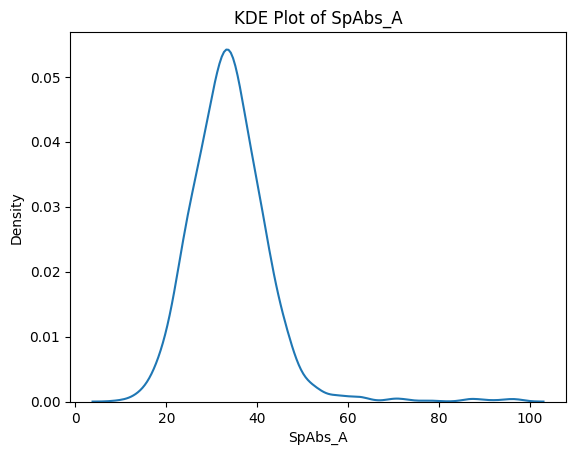

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a KDE plot
sns.kdeplot(X_train['SpAbs_A'])
plt.xlabel('SpAbs_A')
plt.ylabel('Density')
plt.title('KDE Plot of SpAbs_A')
plt.show()

In [27]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "mean")
imputer.fit(X_train)
X_train = pd.DataFrame(imputer.transform(X_train), columns = X_train.columns)
X_train

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,24.357869,17.794542,0.0,0.0,41.215625,2.347422,4.694843,41.215625,1.287988,4.369070,...,10.135749,67.414341,442.210387,7.132426,3.719000e+03,46.0,158.0,179.0,10.500000,7.250000
1,22.969849,18.311017,0.0,0.0,35.941125,2.691135,5.306065,35.941125,1.283612,4.317123,...,10.877198,81.346741,390.240624,6.294204,1.772000e+03,61.0,170.0,218.0,9.826389,5.687500
2,15.604129,12.735781,0.0,0.0,26.207578,2.479573,4.834424,26.207578,1.310379,3.933379,...,9.887612,67.901737,271.157229,6.613591,8.730000e+02,28.0,104.0,121.0,5.145833,4.458333
3,24.248480,17.563645,0.0,0.0,40.562314,2.355998,4.709981,40.562314,1.308462,4.360403,...,10.185617,80.094964,444.090369,9.251883,3.439000e+03,44.0,160.0,184.0,8.750000,6.833333
4,19.746619,16.450850,2.0,0.0,33.938276,2.399239,4.777534,33.938276,1.305318,4.177400,...,10.086101,74.330916,372.125612,8.089687,1.804000e+03,40.0,132.0,155.0,8.388889,6.027778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,22.265059,17.119315,0.0,0.0,37.270853,2.486186,4.733166,37.270853,1.285202,4.279957,...,10.106959,78.650021,402.159100,7.733829,2.877000e+03,42.0,146.0,168.0,9.750000,6.472222
1632,25.421655,19.002671,2.0,0.0,41.130085,2.417357,4.834715,41.130085,1.246366,4.405513,...,10.309652,68.924558,454.171316,8.257660,3.832000e+03,51.0,168.0,193.0,12.583333,7.222222
1633,17.177412,13.499159,0.0,0.0,28.393729,2.445231,4.798280,28.393729,1.290624,4.024393,...,9.983638,64.253785,316.061470,9.030328,1.044000e+03,38.0,116.0,136.0,7.388889,4.833333
1634,24.372550,18.814276,0.0,0.0,39.848651,2.583679,5.065890,39.848651,1.285440,4.372566,...,10.536327,81.901169,421.163771,7.799329,2.894000e+03,55.0,168.0,203.0,10.673611,6.722222


In [28]:
#using KNNimputer to handle missing values
# from sklearn.impute import KNNImputer

# knn_impute = KNNImputer()
# knn_impute.fit(X_train)
# X_train = pd.DataFrame(knn_impute.transform(X_train), columns = X_train.columns)
# X_train

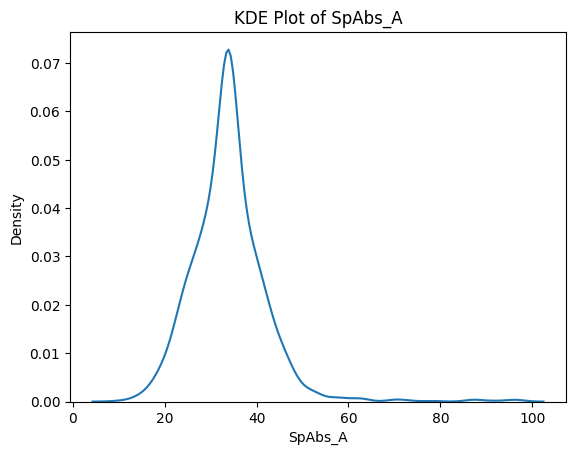

In [29]:
# Plotting a KDE plot
sns.kdeplot(X_train['SpAbs_A'])
plt.xlabel('SpAbs_A')
plt.ylabel('Density')
plt.title('KDE Plot of SpAbs_A')
plt.show()

In [30]:
X_train.isnull().sum()[X_train.isnull().sum() != 0]

Series([], dtype: int64)

**Scaling of dataset**

Is it really necessary?

In [31]:
# scaling the data

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler transformer
scaler = StandardScaler()

# Fit the transformer on the training data
scaler.fit(X_train)

# Transform the training data using the fitted transformer
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_train

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0.709000,0.423986,-0.302060,-0.424576,0.883258,-1.105795,-0.863566,0.883258,0.049383,0.864239,...,0.032137,-0.249090,0.639240,-1.019479,-0.224275,0.313637,0.520120,0.349788,0.624123,0.955756
1,0.454644,0.562551,-0.302060,-0.424576,0.247245,2.869737,2.994625,0.247245,-0.069801,0.639659,...,2.023508,0.953558,0.101450,-1.728947,-0.224275,1.337126,0.829638,1.154413,0.374871,-0.095985
2,-0.895127,-0.933232,-0.302060,-0.424576,-0.926451,0.422726,0.017508,-0.926451,0.659120,-1.019365,...,-0.634306,-0.207018,-1.130843,-1.458619,-0.224276,-0.914551,-0.872711,-0.846833,-1.357045,-0.923355
3,0.688954,0.362038,-0.302060,-0.424576,0.804481,-1.006599,-0.768011,0.804481,0.606913,0.826773,...,0.166070,0.845504,0.658695,0.774421,-0.224275,0.177171,0.571706,0.452945,-0.023419,0.675292
4,-0.136014,0.063486,3.372066,-0.424576,0.005737,-0.506454,-0.341598,0.005737,0.521311,0.035600,...,-0.101208,0.347950,-0.086007,-0.209257,-0.224275,-0.095759,-0.150502,-0.145366,-0.157038,0.133061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,0.325491,0.242829,-0.302060,-0.424576,0.407587,0.499212,-0.621665,0.407587,-0.026496,0.478981,...,-0.045188,0.720776,0.224784,-0.510454,-0.224275,0.040706,0.210602,0.122843,0.346605,0.432223
1632,0.903939,0.748115,3.372066,-0.424576,0.872944,-0.296889,0.019339,0.872944,-1.084060,1.021792,...,0.499203,-0.118728,0.763014,-0.067085,-0.224275,0.654800,0.778052,0.638628,1.395005,0.937058
1633,-0.606822,-0.728424,-0.302060,-0.424576,-0.662839,0.025510,-0.210644,-0.662839,0.121160,-0.625887,...,-0.376401,-0.521910,-0.666167,0.586898,-0.224276,-0.232225,-0.563193,-0.537362,-0.527062,-0.670937
1634,0.711690,0.697570,-0.302060,-0.424576,0.718425,1.626852,1.478579,0.718425,-0.020001,0.879355,...,1.108003,1.001416,0.421447,-0.455015,-0.224275,0.927730,0.778052,0.844942,0.688363,0.600501


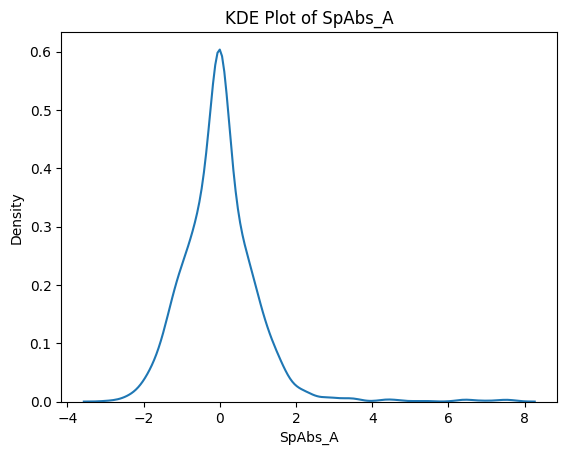

In [32]:
# Plotting a KDE plot
sns.kdeplot(X_train['SpAbs_A'])
plt.xlabel('SpAbs_A')
plt.ylabel('Density')
plt.title('KDE Plot of SpAbs_A')
plt.show()

## **Feature Selection**

**Goal** : To select the most statistically relevant columns


Article link: "https://www.sciencedirect.com/science/article/pii/S0016236122006950#:~:text=The%20method%20focuses%20on%20reducing%20the%20number%20of,identify%20dominant%20chemical-structure%20features%20that%20impact%20property%20values."

In [ ]:
#checking pearson correlations between 

In [35]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
selector.fit(X_train)

mask = selector.get_support() #gets boolean mask of selected features
mask

X_train_selected = X_train.loc[:, mask]
X_train_selected

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0.709000,0.423986,-0.302060,-0.424576,0.883258,-1.105795,-0.863566,0.883258,0.049383,0.864239,...,0.032137,-0.249090,0.639240,-1.019479,-0.224275,0.313637,0.520120,0.349788,0.624123,0.955756
1,0.454644,0.562551,-0.302060,-0.424576,0.247245,2.869737,2.994625,0.247245,-0.069801,0.639659,...,2.023508,0.953558,0.101450,-1.728947,-0.224275,1.337126,0.829638,1.154413,0.374871,-0.095985
2,-0.895127,-0.933232,-0.302060,-0.424576,-0.926451,0.422726,0.017508,-0.926451,0.659120,-1.019365,...,-0.634306,-0.207018,-1.130843,-1.458619,-0.224276,-0.914551,-0.872711,-0.846833,-1.357045,-0.923355
3,0.688954,0.362038,-0.302060,-0.424576,0.804481,-1.006599,-0.768011,0.804481,0.606913,0.826773,...,0.166070,0.845504,0.658695,0.774421,-0.224275,0.177171,0.571706,0.452945,-0.023419,0.675292
4,-0.136014,0.063486,3.372066,-0.424576,0.005737,-0.506454,-0.341598,0.005737,0.521311,0.035600,...,-0.101208,0.347950,-0.086007,-0.209257,-0.224275,-0.095759,-0.150502,-0.145366,-0.157038,0.133061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,0.325491,0.242829,-0.302060,-0.424576,0.407587,0.499212,-0.621665,0.407587,-0.026496,0.478981,...,-0.045188,0.720776,0.224784,-0.510454,-0.224275,0.040706,0.210602,0.122843,0.346605,0.432223
1632,0.903939,0.748115,3.372066,-0.424576,0.872944,-0.296889,0.019339,0.872944,-1.084060,1.021792,...,0.499203,-0.118728,0.763014,-0.067085,-0.224275,0.654800,0.778052,0.638628,1.395005,0.937058
1633,-0.606822,-0.728424,-0.302060,-0.424576,-0.662839,0.025510,-0.210644,-0.662839,0.121160,-0.625887,...,-0.376401,-0.521910,-0.666167,0.586898,-0.224276,-0.232225,-0.563193,-0.537362,-0.527062,-0.670937
1634,0.711690,0.697570,-0.302060,-0.424576,0.718425,1.626852,1.478579,0.718425,-0.020001,0.879355,...,1.108003,1.001416,0.421447,-0.455015,-0.224275,0.927730,0.778052,0.844942,0.688363,0.600501


In [36]:
explore = X_train_selected.copy()
explore

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0.709000,0.423986,-0.302060,-0.424576,0.883258,-1.105795,-0.863566,0.883258,0.049383,0.864239,...,0.032137,-0.249090,0.639240,-1.019479,-0.224275,0.313637,0.520120,0.349788,0.624123,0.955756
1,0.454644,0.562551,-0.302060,-0.424576,0.247245,2.869737,2.994625,0.247245,-0.069801,0.639659,...,2.023508,0.953558,0.101450,-1.728947,-0.224275,1.337126,0.829638,1.154413,0.374871,-0.095985
2,-0.895127,-0.933232,-0.302060,-0.424576,-0.926451,0.422726,0.017508,-0.926451,0.659120,-1.019365,...,-0.634306,-0.207018,-1.130843,-1.458619,-0.224276,-0.914551,-0.872711,-0.846833,-1.357045,-0.923355
3,0.688954,0.362038,-0.302060,-0.424576,0.804481,-1.006599,-0.768011,0.804481,0.606913,0.826773,...,0.166070,0.845504,0.658695,0.774421,-0.224275,0.177171,0.571706,0.452945,-0.023419,0.675292
4,-0.136014,0.063486,3.372066,-0.424576,0.005737,-0.506454,-0.341598,0.005737,0.521311,0.035600,...,-0.101208,0.347950,-0.086007,-0.209257,-0.224275,-0.095759,-0.150502,-0.145366,-0.157038,0.133061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,0.325491,0.242829,-0.302060,-0.424576,0.407587,0.499212,-0.621665,0.407587,-0.026496,0.478981,...,-0.045188,0.720776,0.224784,-0.510454,-0.224275,0.040706,0.210602,0.122843,0.346605,0.432223
1632,0.903939,0.748115,3.372066,-0.424576,0.872944,-0.296889,0.019339,0.872944,-1.084060,1.021792,...,0.499203,-0.118728,0.763014,-0.067085,-0.224275,0.654800,0.778052,0.638628,1.395005,0.937058
1633,-0.606822,-0.728424,-0.302060,-0.424576,-0.662839,0.025510,-0.210644,-0.662839,0.121160,-0.625887,...,-0.376401,-0.521910,-0.666167,0.586898,-0.224276,-0.232225,-0.563193,-0.537362,-0.527062,-0.670937
1634,0.711690,0.697570,-0.302060,-0.424576,0.718425,1.626852,1.478579,0.718425,-0.020001,0.879355,...,1.108003,1.001416,0.421447,-0.455015,-0.224275,0.927730,0.778052,0.844942,0.688363,0.600501


In [49]:
explore.corr()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
ABC,1.000000,0.972505,0.078193,0.093198,0.929287,0.410018,0.438422,0.929287,0.108613,0.901177,...,0.831275,0.792646,0.945741,-0.246797,1.992738e-01,0.945393,0.993729,0.976655,0.825096,0.980953
ABCGG,0.972505,1.000000,0.104663,0.078139,0.879915,0.455600,0.468327,0.879915,0.006638,0.862183,...,0.835988,0.819192,0.931891,-0.206128,2.463091e-01,0.940902,0.971924,0.960576,0.871254,0.958257
nAcid,0.078193,0.104663,1.000000,0.294408,0.019725,-0.012222,-0.009388,0.019725,0.000072,0.020141,...,0.045522,0.076394,0.144649,0.022361,5.470844e-01,0.029458,0.070971,0.059670,0.141142,0.082614
nBase,0.093198,0.078139,0.294408,1.000000,0.071380,0.034843,0.045201,0.071380,0.065401,0.073949,...,0.083854,0.049429,0.152634,-0.122913,2.974355e-01,0.082124,0.092857,0.090428,0.075888,0.093428
SpAbs_A,0.929287,0.879915,0.019725,0.071380,1.000000,0.409502,0.439743,1.000000,0.187874,0.964290,...,0.746716,0.729756,0.892286,-0.255656,6.549706e-07,0.867982,0.917057,0.898163,0.778518,0.921749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WPol,0.945393,0.940902,0.029458,0.082124,0.867982,0.587130,0.627946,0.867982,0.088953,0.842917,...,0.908099,0.756895,0.883898,-0.258538,1.459652e-01,1.000000,0.969024,0.982332,0.816195,0.906141
Zagreb1,0.993729,0.971924,0.070971,0.092857,0.917057,0.486388,0.510027,0.917057,0.123818,0.894328,...,0.877025,0.812578,0.932099,-0.242294,1.919251e-01,0.969024,1.000000,0.994326,0.814871,0.958813
Zagreb2,0.976655,0.960576,0.059670,0.090428,0.898163,0.554883,0.573205,0.898163,0.147380,0.878890,...,0.908905,0.822539,0.908525,-0.239834,1.784239e-01,0.982332,0.994326,1.000000,0.793645,0.929754
mZagreb1,0.825096,0.871254,0.141142,0.075888,0.778518,0.338145,0.385756,0.778518,-0.343927,0.747992,...,0.651832,0.606607,0.858116,-0.139591,2.632331e-01,0.816195,0.814871,0.793645,1.000000,0.837100


In [51]:
def correlation(dataset, threshold):
  col_corr = set()  #Set of all the names of correlated columns
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [54]:
corr_features = correlation(explore, 0.8)
len(set(corr_features))

1007

In [59]:
X_train.drop(corr_features, axis = 1).columns

Index(['ABC', 'nAcid', 'nBase', 'SpMax_A', 'SpMAD_A', 'VE1_A', 'VR1_A',
       'nAromAtom', 'nSpiro', 'nBridgehead',
       ...
       'JGI2', 'JGI3', 'JGI4', 'JGI5', 'JGI6', 'JGI7', 'JGI8', 'JGI9', 'JGI10',
       'WPath'],
      dtype='object', length=510)

In [62]:
col_names = list(X_train.drop(corr_features, axis = 1).columns)

## **Data Imbalance**

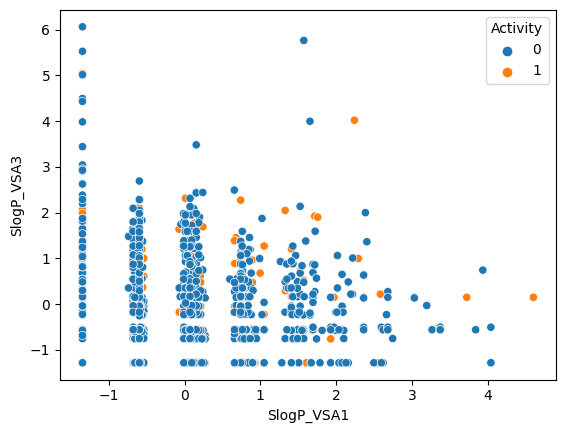

In [ ]:
#visualizing the datapoints across two features to observe the imbalance in datapoints

sns.scatterplot(data = X_train, x = "SlogP_VSA1", y = "SlogP_VSA3", hue = y)
plt.show()


In [ ]:
#resampling our data using SMOTE

from imblearn.over_sampling import SMOTE
# assume X is your feature matrix and y is your target vector
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
X_resampled

,SlogP_VSA6,TIC5,EState_VSA1,SlogP_VSA2,EState_VSA10,PEOE_VSA8,SMR_VSA1,ATS7p,ATS5pe,SlogP_VSA1,...,GATS6c,NssSiH2,AATS7i,nG12AHRing,GATS8dv,n11AHRing,GATS3i,GATS4se,GATS8i,n6ARing
0,0.412576,0.749424,-0.594528,0.279615,-0.624107,1.252726,-0.614512,0.539593,0.217936,-0.596049,...,-0.086509,0.0,-0.012144,-0.101667,-0.191953,0.0,0.229393,-0.243069,0.091202,0.490403
1,-0.730362,-0.211745,0.220389,-0.267457,0.462361,-0.521668,0.667392,-0.158193,-0.102549,-0.596049,...,-0.119290,0.0,0.452674,-0.101667,-0.181521,0.0,-0.882690,-1.037264,0.458348,1.665678
2,1.934249,1.728281,0.260559,0.304982,1.232809,0.468168,0.805417,2.036765,1.508719,-0.596049,...,-0.247606,0.0,-0.264310,7.271433,-0.225487,0.0,0.125991,-0.603452,0.020965,-0.684873
3,0.136094,0.306807,0.107539,0.307285,0.417442,0.044180,-0.243891,0.280857,-0.021321,-0.596049,...,0.340771,0.0,-0.426477,-0.101667,0.298448,0.0,0.852457,2.228344,-1.053487,-0.684873
4,-1.606864,-0.242946,-0.594528,-0.534356,-0.030871,-0.957616,-0.140726,-0.324250,0.116766,-0.677920,...,-0.007629,0.0,0.377046,-0.101667,1.369382,0.0,0.613314,-0.400642,-1.086951,-0.684873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789,-2.147615,-0.732864,-0.594528,0.787529,-0.752775,0.135902,-1.138216,-0.793071,-0.615945,-1.346646,...,1.710066,0.0,-0.096805,-0.101667,1.210915,0.0,-1.166022,-0.712812,0.561809,1.226880
2790,-0.541050,-0.388089,-0.594528,-0.914451,-1.113952,-0.468294,-1.390476,-0.592184,-0.517675,0.072325,...,0.699747,0.0,1.263209,-0.101667,0.088814,0.0,0.011134,-1.752482,-1.447603,-0.684873
2791,-1.873318,0.772719,2.409090,1.045153,1.871632,0.238537,1.662534,0.664088,2.732611,-1.346646,...,0.624700,0.0,1.101593,-0.101667,0.312399,0.0,1.267984,-0.512582,-0.986608,4.870076
2792,-0.429408,-1.368804,1.357830,-0.373917,1.010679,-0.990459,0.200278,-1.067879,-1.055716,-0.738489,...,0.573566,0.0,-0.009993,-0.101667,2.724074,0.0,0.561854,0.796338,-1.998676,-0.219219


In [ ]:
y_resampled

0       0
1       0
2       1
3       0
4       0
       ..
2789    1
2790    1
2791    1
2792    1
2793    1
Name: Activity, Length: 2794, dtype: int64

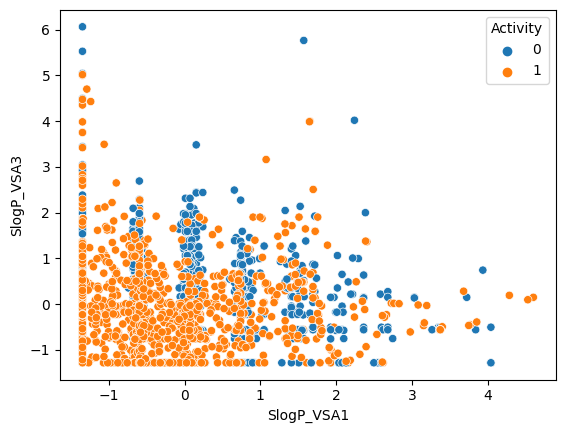

In [ ]:
#plotting resampled data to visualize datapoints distribution

sns.scatterplot(x = X_resampled["SlogP_VSA1"], y = X_resampled["SlogP_VSA3"], hue = y_resampled)
plt.show()

# Pipeline for processing test data

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# # def transform_dtype(data):
# #   X_transformed = data.applymap(convert_to_float_or_not_available(x))
# #   return X_transformed

# def transform_dtype(data):
#     X_transformed = np.vectorize(convert_to_float_or_not_available)(data)
#     return X_transformed.astype(float)


# Column_selector = ColumnTransformer(
#     transformers=[
#         ("relevant_cols", "passthrough", mi_cols)
#     ]
# )

# # Define the pipeline
# my_pipeline = Pipeline([
#     ("preprocessor", Column_selector),
#     ("dtype_transformer", FunctionTransformer(transform_dtype)),
#     ("imputer", imputer),
#     ("scaler", scaler)
# ])


In [74]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


Column_selector = ColumnTransformer(
    transformers=[
        ("relevant_cols", "passthrough", col_names)
    ]
)

test_pipeline = Pipeline([
              ("preprocessor", Column_selector),
              ("Imputation", SimpleImputer()),
              ("Scaling", StandardScaler())
])
test_pipeline.fit(X_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('relevant_cols',
                                                  'passthrough',
                                                  ['ABC', 'nAcid', 'nBase',
                                                   'SpMax_A', 'SpMAD_A',
                                                   'VE1_A', 'VR1_A',
                                                   'nAromAtom', 'nSpiro',
                                                   'nBridgehead', 'nHetero',
                                                   'nB', 'nN', 'nO', 'nS', 'nP',
                                                   'nF', 'nCl', 'nBr', 'nI',
                                                   'ATS0Z', 'ATS0p', 'AATS0dv',
                                                   'AATS7d', 'AATS0s', 'AATS6s',
                                                   'AATS7s', 'AATS8s', 'AATS0Z',
                                                   'AATS1Z', ...])])),
                ('Imputation', SimpleImputer()),
                ('Scaling', StandardScaler())])

In [75]:
transformed_X_train = test_pipeline.transform(X_train)
transformed_X_train

array([[ 0.7089995 , -0.30205982, -0.42457551, ..., -0.89931759,
         0.07529159, -0.22427475],
       [ 0.45464424, -0.30205982, -0.42457551, ...,  0.74074851,
         0.65470069, -0.2242754 ],
       [-0.89512704, -0.30205982, -0.42457551, ..., -1.09258543,
        -0.18763544, -0.22427571],
       ...,
       [-0.60682238, -0.30205982, -0.42457551, ...,  0.36711371,
         1.24145448, -0.22427565],
       [ 0.71168966, -0.30205982, -0.42457551, ..., -0.73340379,
         0.30360026, -0.22427503],
       [ 5.53690534,  3.37206558,  3.21210265, ...,  0.84366879,
         0.58890457,  9.72972225]])

In [76]:
transformed_X_test = test_pipeline.transform(X_test)
transformed_X_test

array([[-6.26868107e-01, -3.02059820e-01, -4.24575506e-01, ...,
        -7.79292444e-02, -6.48146613e-04, -2.24275594e-01],
       [ 4.84163043e-01, -3.02059820e-01,  1.39376357e+00, ...,
         4.00408672e-01,  4.65735980e-01, -2.24274992e-01],
       [ 7.50528602e-01,  7.04619097e+00,  1.39376357e+00, ...,
         2.93507395e-01, -6.74422518e-01,  4.33094234e+00],
       ...,
       [ 2.06538920e+00,  1.53500288e+00, -4.24575506e-01, ...,
         9.07864934e-01,  1.35283348e-01, -2.24273637e-01],
       [-1.11031151e+00, -3.02059820e-01, -4.24575506e-01, ...,
        -2.19585790e-01,  7.49617930e-01, -2.24275727e-01],
       [-8.83837061e-01,  1.53500288e+00,  1.39376357e+00, ...,
        -1.36428230e+00, -1.00509667e+00,  5.18056339e-01]])

In [77]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Define and train the model
rfc = RandomForestClassifier()
rfc.fit(transformed_X_train, y_train)
#rfc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rfc.predict(transformed_X_test)
#y_pred = rfc.predict(X_test)


# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7877492877492878
